In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

- Restaurant - Number of branches - Locations
- Restaurant - Cuisines
- Restaurant - Popularity (Number of Branches, Votes, Reviews)
- Restaurant - Cost
- Restaurant - Delivery Time
- Cuisine - Number of Branches, Votes, Reviews)
- Group the cuisines into categories - Regional, 


City-wise stats - Number of restaurants, Average costs, Minimum Order, Votes, Reviews, rating, delivery time, cuisine in most restaurants

## Read dataset & inspect

In [2]:
food = pd.read_excel('data/Data_Train.xlsx')
food

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",₹200,₹50,3.5,12,4,30 minutes
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",₹100,₹50,3.5,11,4,30 minutes
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",₹150,₹50,3.6,99,30,65 minutes
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",₹250,₹99,3.7,176,95,30 minutes
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",₹200,₹99,3.2,521,235,65 minutes
...,...,...,...,...,...,...,...,...,...
11089,ID_8067,"BTM Layout 1, Electronic City","Tibetan, Chinese, Continental, Momos",₹250,₹50,4.2,326,189,30 minutes
11090,ID_4620,"Sector 14, Noida",Fast Food,₹100,₹50,3.6,36,16,30 minutes
11091,ID_3392,Majestic,"South Indian, Chinese, North Indian",₹100,₹50,3.5,45,18,30 minutes
11092,ID_4115,"Sector 3, Marathalli",North Indian,₹100,₹50,3.1,24,9,30 minutes


In [3]:
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11094 entries, 0 to 11093
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Restaurant     11094 non-null  object
 1   Location       11094 non-null  object
 2   Cuisines       11094 non-null  object
 3   Average_Cost   11094 non-null  object
 4   Minimum_Order  11094 non-null  object
 5   Rating         11094 non-null  object
 6   Votes          11094 non-null  object
 7   Reviews        11094 non-null  object
 8   Delivery_Time  11094 non-null  object
dtypes: object(9)
memory usage: 780.2+ KB


In [4]:
food.describe()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
count,11094,11094,11094,11094,11094,11094,11094,11094,11094
unique,7480,35,2179,26,18,33,1103,761,7
top,ID_7184,"Mico Layout, Stage 2, BTM Layout,Bangalore",North Indian,₹200,₹50,-,-,-,30 minutes
freq,22,947,850,3241,10118,1191,2074,2312,7406


In [5]:
food.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",₹200,₹50,3.5,12,4,30 minutes
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",₹100,₹50,3.5,11,4,30 minutes
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",₹150,₹50,3.6,99,30,65 minutes
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",₹250,₹99,3.7,176,95,30 minutes
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",₹200,₹99,3.2,521,235,65 minutes


In [6]:
len(food['Restaurant'].unique().tolist())

7480

## Preporcessing
- Convert to correct format
- Handle Missing/invalid value

- Average_Cost : Convert to int
- Rating, Votes, Reviews : 
    - Convert to int
    - All non-ints --> NaNs --> 0

In [7]:
# Average_Cost
print(food['Average_Cost'].head(3))
food['Average_Cost'] = food['Average_Cost'].apply(lambda x: str(x[1:].replace(',','')))
food['Average_Cost'] = pd.to_numeric(food['Average_Cost'], errors='coerce')
food['Average_Cost'].isnull().sum()
print(food.shape[0])
food.dropna(inplace=True)
print(food.shape[0])
food['Average_Cost'].head(3)

0    ₹200
1    ₹100
2    ₹150
Name: Average_Cost, dtype: object
11094
11093


0    200.0
1    100.0
2    150.0
Name: Average_Cost, dtype: float64

In [8]:
# Rating, Votes, Reviews
food['Rating'] = pd.to_numeric(food['Rating'], errors='coerce')
food['Votes'] = pd.to_numeric(food['Votes'], errors='coerce')
food['Reviews'] = pd.to_numeric(food['Reviews'], errors='coerce')
print(food[['Rating','Votes','Reviews']].isnull().sum())
food[['Rating','Votes','Reviews']] = food[['Rating','Votes','Reviews']].fillna(0)
print(food[['Rating','Votes','Reviews']].isnull().sum())

Rating     1962
Votes      2073
Reviews    2311
dtype: int64
Rating     0
Votes      0
Reviews    0
dtype: int64


In [9]:
food.dtypes

Restaurant        object
Location          object
Cuisines          object
Average_Cost     float64
Minimum_Order     object
Rating           float64
Votes            float64
Reviews          float64
Delivery_Time     object
dtype: object

In [10]:
# Extract city from the location and add it as a column

## food_location

In [11]:
food.groupby(by='Location').agg({'Restaurant':'count'}).sort_values(by='Restaurant', ascending=False)

,Restaurant
Location,
"Mico Layout, Stage 2, BTM Layout,Bangalore",947
"D-Block, Sector 63, Noida",806
"Sector 1, Noida",791
"FTI College, Law College Road, Pune",584
Delhi University-GTB Nagar,545
"Laxman Vihar Industrial Area, Sector 3A, Gurgoan",493
"Sector 14, Noida",489
"Delhi Administration Flats, Timarpur",472
Mumbai Central,459


In [12]:
food[food['Location']=='Mico Layout, Stage 2, BTM Layout,Bangalore'].sort_values(by='Restaurant') #.groupby(by='Restaurant') #.agg({'Location':'count'}).sort_values(by='Location', ascending=False)

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
419,ID_1000,"Mico Layout, Stage 2, BTM Layout,Bangalore","Bohri, Biryani",250.0,₹50,3.7,96.0,55.0,30 minutes
6621,ID_1013,"Mico Layout, Stage 2, BTM Layout,Bangalore","Desserts, Ice Cream",100.0,₹50,3.8,20.0,10.0,65 minutes
5426,ID_1014,"Mico Layout, Stage 2, BTM Layout,Bangalore",Ice Cream,100.0,₹50,3.8,28.0,16.0,30 minutes
6962,ID_1015,"Mico Layout, Stage 2, BTM Layout,Bangalore","Continental, Desserts, Beverages, Sandwich",200.0,₹50,3.1,5.0,4.0,30 minutes
4706,ID_1019,"Mico Layout, Stage 2, BTM Layout,Bangalore","Maharashtrian, Fast Food, Street Food, Sandwich",100.0,₹50,4.1,46.0,17.0,30 minutes
...,...,...,...,...,...,...,...,...,...
3599,ID_957,"Mico Layout, Stage 2, BTM Layout,Bangalore","Continental, Steak, Salad, Cafe",500.0,₹50,4.1,442.0,256.0,45 minutes
3825,ID_974,"Mico Layout, Stage 2, BTM Layout,Bangalore","Cafe, Fast Food, Beverages",200.0,₹50,3.7,45.0,23.0,45 minutes
4329,ID_980,"Mico Layout, Stage 2, BTM Layout,Bangalore","Asian, Thai, North Indian, Chinese",450.0,₹50,4.3,429.0,279.0,30 minutes
4230,ID_99,"Mico Layout, Stage 2, BTM Layout,Bangalore","South Indian, Street Food, Fast Food",100.0,₹50,3.9,116.0,27.0,30 minutes


In [13]:
#food['City'] = food['Location'].apply(lambda x : len(x.split(',')))
food['City'] = food['Location'].apply(lambda x: x.split(',')[-1].strip() if len(x.split(',')) > 0 else x.split(',')[0].strip())
food.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,City
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",200.0,₹50,3.5,12.0,4.0,30 minutes,Pune
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",100.0,₹50,3.5,11.0,4.0,30 minutes,Marathalli
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",150.0,₹50,3.6,99.0,30.0,65 minutes,Mumbai Central
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",250.0,₹99,3.7,176.0,95.0,30 minutes,Noida
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",200.0,₹99,3.2,521.0,235.0,65 minutes,Whitefield


In [14]:
food['City'].value_counts()

Noida                         2086
Pune                          1358
Bangalore                      947
Mumbai CST Area                661
Kolkata                        546
Delhi University-GTB Nagar     545
Gurgoan                        493
Timarpur                       472
Mumbai Central                 459
Whitefield                     457
India Gate                     411
Marathalli                     366
Majestic                       334
Delhi Cantt.                   326
Maharashtra                    307
Hyderabad                      294
Delhi                          282
Pune University                277
Gurgaon                        260
Mumbai                         109
Begumpet                        81
Electronic City                 22
Name: City, dtype: int64

In [15]:
def getCity(x):
    if x in ['Mumbai CST Area', 'Mumbai Central', 'Maharashtra']: return 'Mumbai'
    if x in ['Delhi University-GTB Nagar', 'Timarpur','India Gate', 'Delhi Cantt.' ]: return 'Delhi'
    if x in ['Whitefield','Marathalli', 'Majestic', 'Electronic City' ]: return 'Bangalore'
    if x in ['Begumpet']: return 'Hyderabad'
    if x in ['Gurgoan']: return 'Gurgaon'
    if x in ['Pune University']: return 'Pune'
    return x
    

food['City'] = food['City'].apply(lambda x: getCity(x))

In [16]:
food['City'].value_counts()

Bangalore    2126
Noida        2086
Delhi        2036
Pune         1635
Mumbai       1536
Gurgaon       753
Kolkata       546
Hyderabad     375
Name: City, dtype: int64

In [17]:
food.to_csv("out/restaurant.csv")

In [18]:
food_city = food.groupby(by='City').agg({'Restaurant':'count', 'Average_Cost': np.average, 'Rating': np.average, 'Votes': np.average, 'Reviews': np.average}).round(2)
print(food_city.sort_values(by='Restaurant', ascending=False))
print(food_city.sort_values(by='Average_Cost', ascending=False))

           Restaurant  Average_Cost  Rating   Votes  Reviews
City                                                        
Bangalore        2126        192.29    3.05  199.05    96.42
Noida            2086        204.79    2.89  161.93    84.20
Delhi            2036        205.89    2.95  201.52   103.45
Pune             1635        216.82    3.01  246.58   123.00
Mumbai           1536        223.40    3.07  236.86   119.99
Gurgaon           753        201.66    2.75  103.08    49.54
Kolkata           546        161.45    2.95  230.99   105.48
Hyderabad         375        148.80    3.07  170.25    28.81
           Restaurant  Average_Cost  Rating   Votes  Reviews
City                                                        
Mumbai           1536        223.40    3.07  236.86   119.99
Pune             1635        216.82    3.01  246.58   123.00
Delhi            2036        205.89    2.95  201.52   103.45
Noida            2086        204.79    2.89  161.93    84.20
Gurgaon           753   

## food_restaurant

In [19]:
food.columns

Index(['Restaurant', 'Location', 'Cuisines', 'Average_Cost', 'Minimum_Order',
       'Rating', 'Votes', 'Reviews', 'Delivery_Time', 'City'],
      dtype='object')

### food_restaurant_cuisine

In [20]:
food_restaurant_1 = food.groupby(by=['Restaurant', 'Cuisines']).agg({'Cuisines':'count', 'City': 'nunique', 'Rating':np.average, 'Votes': np.average, 'Reviews':np.average}).round(2)
food_restaurant_1.rename(columns={'Cuisines':'Count'}, inplace=True)
food_restaurant_1.reset_index(inplace=True)
print(food_restaurant_1.sort_values(by='Count', ascending=False))

     Restaurant                                    Cuisines  Count  City  \
4376    ID_5321  Biryani, Hyderabadi, North Indian, Mughlai     19     7   
4591    ID_5538                     North Indian, Beverages     19     8   
1333    ID_2301                            Pizza, Fast Food     17     6   
6844    ID_7750      Asian, Biryani, North Indian, Desserts     14     6   
3713    ID_4654                           Burger, Fast Food     14     5   
...         ...                                         ...    ...   ...   
3027    ID_3992                       Biryani, North Indian      1     1   
3024     ID_399                                      Andhra      1     1   
3023    ID_3989                     North Indian, Fast Food      1     1   
3021    ID_3986         Rolls, Kebab, Mughlai, North Indian      1     1   
3961    ID_4904                       Mughlai, North Indian      1     1   

      Rating   Votes  Reviews  
4376    1.77    5.16     3.05  
4591    2.06    3.47   

In [21]:
print(food_restaurant_1.sort_values(by='Count', ascending=False)[:10])

     Restaurant                                    Cuisines  Count  City  \
4376    ID_5321  Biryani, Hyderabadi, North Indian, Mughlai     19     7   
4591    ID_5538                     North Indian, Beverages     19     8   
1333    ID_2301                            Pizza, Fast Food     17     6   
6844    ID_7750      Asian, Biryani, North Indian, Desserts     14     6   
3713    ID_4654                           Burger, Fast Food     14     5   
6258    ID_7184    Fast Food, Healthy Food, Sandwich, Salad     13     5   
3008    ID_3970                           Burger, Fast Food     13     4   
6635    ID_7544                         Desserts, Beverages     13     4   
6277     ID_720              Biryani, North Indian, Mughlai     12     6   
5301    ID_6229                            Rolls, Fast Food     11     4   

      Rating   Votes  Reviews  
4376    1.77    5.16     3.05  
4591    2.06    3.47     1.53  
1333    3.57  452.53   101.47  
6844    3.86   47.21    34.71  
371

<AxesSubplot:>

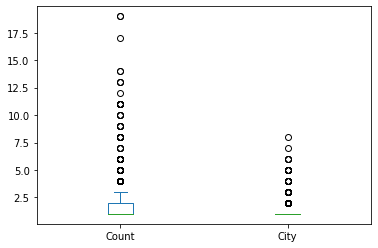

In [46]:
food_restaurant_1[['Count', 'City']].plot.box()

<AxesSubplot:>

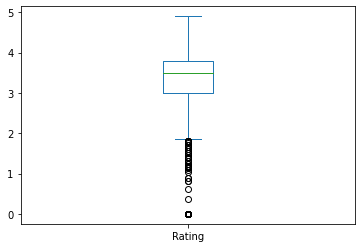

In [50]:
food_restaurant_1[['Rating']].plot.box()

<AxesSubplot:>

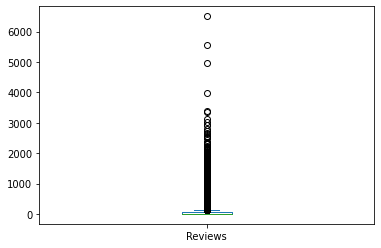

In [49]:
food_restaurant_1[['Reviews']].plot.box()

<AxesSubplot:>

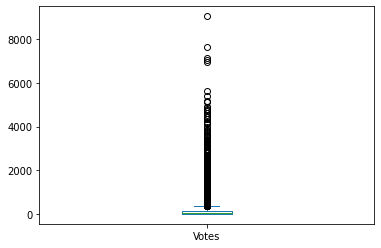

In [48]:
food_restaurant_1[['Votes']].plot.box()

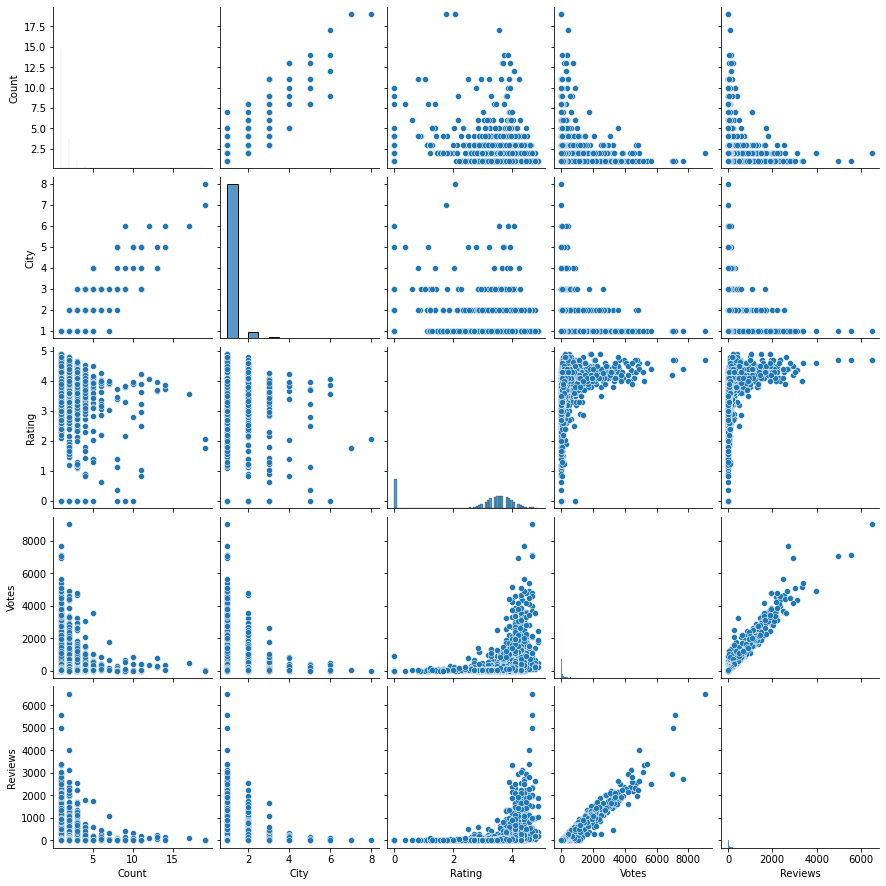

In [51]:
sns.pairplot(data=food_restaurant_1)

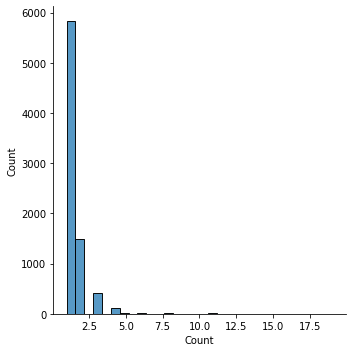

In [56]:
sns.displot(food_restaurant_1['Count'], bins=30)

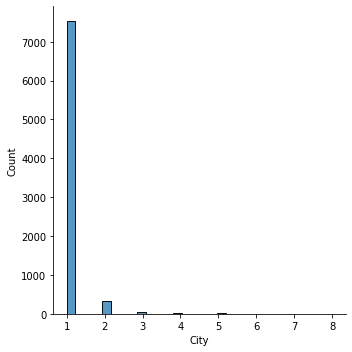

In [57]:
sns.displot(food_restaurant_1['City'], bins=30)

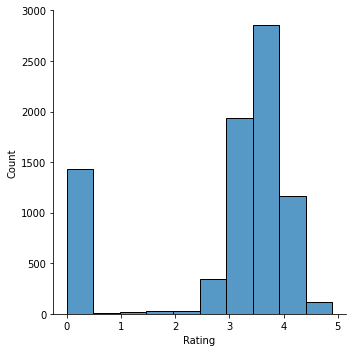

In [59]:
sns.displot(food_restaurant_1['Rating'], bins=10)

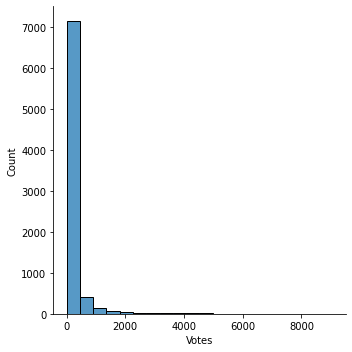

In [61]:
sns.displot(food_restaurant_1['Votes'], bins=20)

In [22]:
food_restaurant_1.columns

Index(['Restaurant', 'Cuisines', 'Count', 'City', 'Rating', 'Votes',
       'Reviews'],
      dtype='object')

In [23]:
food_restaurant_1[food_restaurant_1['Restaurant'].isin(['ID_7184','ID_7295','ID_4625'])]

,Restaurant,Cuisines,Count,City,Rating,Votes,Reviews
3678,ID_4625,"Fast Food, North Eastern, Momos",11,3,1.04,2.18,2.09
3679,ID_4625,"North Eastern, Momos, Fast Food, Beverages, Ti...",9,3,2.17,1.89,1.44
6258,ID_7184,"Fast Food, Healthy Food, Sandwich, Salad",13,5,3.71,195.62,63.69
6259,ID_7184,"Wraps, Healthy Food, Sandwich, Salad",9,3,3.79,542.67,157.89
6377,ID_7295,"Bakery, Desserts",9,4,3.84,65.67,40.33
6378,ID_7295,"Bakery, Desserts, Ice Cream",11,3,3.64,59.73,29.82


### food_restaurant

In [24]:
food_restaurant = food.groupby(by='Restaurant').agg({'Cuisines':'count', 'City': 'nunique', 'Average_Cost': np.average, 
                                                        'Rating':np.average, 'Votes': np.average, 'Reviews':np.average}).round(2)
food_restaurant.rename(columns={'Cuisines':'Count'}, inplace=True)
print(food_restaurant.sort_values(by='Count', ascending=False))

            Count  City  Average_Cost  Rating   Votes  Reviews
Restaurant                                                    
ID_7184        22     8        179.55    3.74  337.59   102.23
ID_7295        20     7        150.00    3.73   62.40    34.55
ID_4625        20     6        100.00    1.54    2.05     1.80
ID_5321        19     7        100.00    1.77    5.16     3.05
ID_5538        19     8        100.00    2.06    3.47     1.53
...           ...   ...           ...     ...     ...      ...
ID_4915         1     1        100.00    0.00    0.00     0.00
ID_1            1     1        400.00    0.00    0.00     0.00
ID_4913         1     1        200.00    3.40  116.00    17.00
ID_4912         1     1        600.00    3.90  161.00    80.00
ID_0            1     1        150.00    0.00    0.00     0.00

[7480 rows x 6 columns]


In [25]:
print(food_restaurant.sort_values(by='Rating', ascending=False))

            Count  City  Average_Cost  Rating   Votes  Reviews
Restaurant                                                    
ID_678          1     1         500.0     4.9  2472.0   1875.0
ID_5776         1     1         350.0     4.9  1793.0   1028.0
ID_7748         1     1         550.0     4.9  1881.0   1509.0
ID_6682         1     1         550.0     4.9   227.0    213.0
ID_213          1     1         600.0     4.9   475.0    397.0
...           ...   ...           ...     ...     ...      ...
ID_5527         1     1         100.0     0.0     0.0      0.0
ID_148          4     1          50.0     0.0     0.0      0.0
ID_5534         1     1         150.0     0.0     0.0      0.0
ID_1482         1     1          50.0     0.0     0.0      0.0
ID_0            1     1         150.0     0.0     0.0      0.0

[7480 rows x 6 columns]


In [26]:
food_restaurant['Rating'].value_counts().to_frame().reset_index().rename(columns={'Rating':'Count', 'index':'Rating'}).sort_values(by='Rating',ascending=False)

,Rating,Count
48,4.90,5
30,4.80,9
22,4.70,23
188,4.67,1
135,4.63,1
...,...,...
178,0.75,1
166,0.62,1
140,0.60,1
125,0.36,1


In [27]:
## Bin the rating and plot rating to number of restaurants

In [28]:
food_restaurant[food_restaurant['Rating']==4.9].reset_index()#.join(food, how='left', on='Restaurant', lsuffix='_l')

,Restaurant,Count,City,Average_Cost,Rating,Votes,Reviews
0,ID_213,1,1,600.0,4.9,475.0,397.0
1,ID_5776,1,1,350.0,4.9,1793.0,1028.0
2,ID_6682,1,1,550.0,4.9,227.0,213.0
3,ID_678,1,1,500.0,4.9,2472.0,1875.0
4,ID_7748,1,1,550.0,4.9,1881.0,1509.0


In [29]:
food[food['Restaurant']=='ID_7184']

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,City
471,ID_7184,"Moulali, Kolkata","Fast Food, Healthy Food, Sandwich, Salad",200.0,₹50,3.7,132.0,52.0,30 minutes,Kolkata
1381,ID_7184,"Delhi Administration Flats, Timarpur","Wraps, Healthy Food, Sandwich, Salad",150.0,₹50,4.1,937.0,278.0,45 minutes,Delhi
1491,ID_7184,"Sandhurst Road, Mumbai CST Area","Fast Food, Healthy Food, Sandwich, Salad",200.0,₹50,3.1,254.0,91.0,30 minutes,Mumbai
1658,ID_7184,"Delhi High Court, India Gate","Wraps, Healthy Food, Sandwich, Salad",150.0,₹50,3.5,264.0,131.0,65 minutes,Delhi
1681,ID_7184,Delhi Cantt.,"Wraps, Healthy Food, Sandwich, Salad",150.0,₹0,3.8,428.0,133.0,65 minutes,Delhi
2168,ID_7184,"Hyderabad Public School, Begumpet","Fast Food, Healthy Food, Sandwich, Salad",200.0,₹50,3.7,29.0,8.0,30 minutes,Hyderabad
2271,ID_7184,"Gora Bazar, Rajbari, North Dumdum, Kolkata","Fast Food, Healthy Food, Sandwich, Salad",200.0,₹50,4.0,373.0,171.0,30 minutes,Kolkata
3024,ID_7184,Pune University,"Fast Food, Healthy Food, Sandwich, Salad",200.0,₹50,4.1,200.0,62.0,45 minutes,Pune
3063,ID_7184,"Sector 3, Marathalli","Fast Food, Healthy Food, Sandwich, Salad",200.0,₹50,3.6,57.0,16.0,30 minutes,Bangalore
3215,ID_7184,"Jaya Nagar, Saidabad, Hyderabad","Fast Food, Healthy Food, Sandwich, Salad",200.0,₹50,3.5,254.0,22.0,30 minutes,Hyderabad


In [30]:
food_restaurant.to_csv("out/food_restaurant.csv")

## food_categories

In [31]:
cuisines_ = food['Cuisines'].value_counts().index.tolist()
cuisines = []
for c in cuisines_:
    cuisines.extend([i.strip() for i in c.split(',')])
cuisines = list(set(cuisines))
cuisines = sorted(cuisines)
print(len(cuisines), cuisines)

101 ['Afghan', 'African', 'American', 'Andhra', 'Arabian', 'Asian', 'Assamese', 'Awadhi', 'BBQ', 'Bakery', 'Bangladeshi', 'Bar Food', 'Belgian', 'Bengali', 'Beverages', 'Bihari', 'Biryani', 'Bohri', 'Brazilian', 'Bubble Tea', 'Burger', 'Burmese', 'Cafe', 'Cantonese', 'Charcoal Chicken', 'Chettinad', 'Chinese', 'Coffee', 'Continental', 'Desserts', 'European', 'Fast Food', 'Finger Food', 'French', 'Frozen Yogurt', 'German', 'Goan', 'Greek', 'Gujarati', 'Healthy Food', 'Hot dogs', 'Hyderabadi', 'Ice Cream', 'Indian', 'Indonesian', 'Iranian', 'Israeli', 'Italian', 'Japanese', 'Juices', 'Kashmiri', 'Kebab', 'Kerala', 'Konkan', 'Korean', 'Lebanese', 'Lucknowi', 'Maharashtrian', 'Malaysian', 'Malwani', 'Mangalorean', 'Mediterranean', 'Mexican', 'Middle Eastern', 'Mishti', 'Mithai', 'Modern Indian', 'Momos', 'Mughlai', 'Naga', 'Nepalese', 'North Eastern', 'North Indian', 'Odia', 'Paan', 'Parsi', 'Pizza', 'Poké', 'Portuguese', 'Rajasthani', 'Raw Meats', 'Roast Chicken', 'Rolls', 'Salad', 'Sandw

In [32]:
cuisines_ = food['Cuisines'].value_counts().index.tolist()
cuisines_restaurants_ = {}
for c in cuisines_:
    for i in c.split(','):
        cuisine = i.strip()
        if cuisine in cuisines_restaurants_.keys():
            cuisines_restaurants_[cuisine] += 1
        else:
            cuisines_restaurants_[cuisine] = 1   
cuisines_restaurants_ = dict(sorted(cuisines_restaurants_.items(), key=lambda item: item[1], reverse=True))   
print(len(cuisines_restaurants_), cuisines_restaurants_)
cuisines_restaurants = pd.DataFrame(list(zip(cuisines_restaurants_.keys(), cuisines_restaurants_.values())), columns=['Cuisine','Number of Restaurants'])
cuisines_restaurants.head()
cuisines_restaurants.to_csv('out/cuisines_restaurants.csv')

101 {'North Indian': 970, 'Chinese': 822, 'Fast Food': 655, 'Beverages': 435, 'Continental': 317, 'Italian': 312, 'Desserts': 293, 'Biryani': 285, 'South Indian': 284, 'Mughlai': 218, 'Street Food': 202, 'Cafe': 188, 'Rolls': 161, 'Pizza': 154, 'Burger': 151, 'Sandwich': 141, 'Salad': 133, 'Healthy Food': 129, 'Momos': 128, 'Asian': 119, 'Seafood': 114, 'Bakery': 110, 'Mithai': 94, 'Thai': 88, 'Kebab': 83, 'American': 81, 'Ice Cream': 69, 'Mexican': 66, 'Juices': 62, 'European': 52, 'Bengali': 49, 'Andhra': 46, 'Arabian': 46, 'Lebanese': 45, 'Finger Food': 45, 'Maharashtrian': 43, 'Wraps': 41, 'Kerala': 41, 'Japanese': 38, 'BBQ': 34, 'Hyderabadi': 29, 'Tea': 28, 'Mediterranean': 23, 'Sushi': 21, 'Tibetan': 19, 'Rajasthani': 18, 'Coffee': 17, 'Modern Indian': 16, 'Mangalorean': 15, 'Afghan': 15, 'Mishti': 13, 'Bar Food': 13, 'Odia': 11, 'Vietnamese': 11, 'Gujarati': 11, 'Malwani': 10, 'Korean': 10, 'Bihari': 10, 'Chettinad': 10, 'Awadhi': 9, 'Steak': 9, 'Malaysian': 9, 'Raw Meats': 9, '

In [109]:
def getCuisines(df):
    cuisines_ = df['Cuisines'].value_counts().index.tolist()
    cuisines_restaurants_ = {}
    for c in cuisines_:
        for i in c.split(','):
            cuisine = i.strip()
            if cuisine in cuisines_restaurants_.keys():
                cuisines_restaurants_[cuisine] += 1
            else:
                cuisines_restaurants_[cuisine] = 1   
    cuisines_restaurants_ = dict(sorted(cuisines_restaurants_.items(), key=lambda item: item[1], reverse=True))   
    print(len(cuisines_restaurants_), cuisines_restaurants_)

for city in food['City'].unique().tolist():
    print(city)
    getCuisines(food[food['City']==city])


Pune
76 {'North Indian': 220, 'Fast Food': 175, 'Chinese': 152, 'Beverages': 99, 'Italian': 88, 'Continental': 82, 'Desserts': 70, 'Cafe': 63, 'South Indian': 61, 'Street Food': 56, 'Salad': 53, 'Biryani': 50, 'Mughlai': 43, 'Pizza': 41, 'Asian': 35, 'Maharashtrian': 34, 'European': 25, 'Healthy Food': 24, 'Burger': 23, 'Seafood': 22, 'Sandwich': 22, 'Bakery': 21, 'Ice Cream': 21, 'Kebab': 19, 'Thai': 19, 'Finger Food': 19, 'Rolls': 18, 'Mexican': 18, 'Momos': 14, 'American': 13, 'Juices': 12, 'Tea': 8, 'Lebanese': 8, 'Modern Indian': 8, 'Mithai': 7, 'Malwani': 7, 'Mediterranean': 7, 'Coffee': 6, 'Bar Food': 6, 'Japanese': 5, 'Wraps': 5, 'Hyderabadi': 4, 'Bengali': 4, 'Sushi': 4, 'Kerala': 3, 'Malaysian': 3, 'Korean': 3, 'Steak': 3, 'Mangalorean': 3, 'BBQ': 3, 'German': 3, 'Konkan': 3, 'Lucknowi': 3, 'Paan': 3, 'North Eastern': 2, 'Vietnamese': 2, 'Brazilian': 2, 'Arabian': 2, 'French': 2, 'Bubble Tea': 2, 'Turkish': 2, 'Iranian': 2, 'Kashmiri': 2, 'South American': 1, 'Tibetan': 1, 'A

In [65]:
food['CusineNum'] = food['Cuisines'].apply(lambda x: len(x.split(',')))

In [66]:
food.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,City,category,CusineNum
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",200.0,₹50,3.5,12.0,4.0,30 minutes,Pune,No Idea,5
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",100.0,₹50,3.5,11.0,4.0,30 minutes,Bangalore,No Idea,2
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",150.0,₹50,3.6,99.0,30.0,65 minutes,Mumbai,International,3
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",250.0,₹99,3.7,176.0,95.0,30 minutes,Noida,No Idea,3
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",200.0,₹99,3.2,521.0,235.0,65 minutes,Bangalore,No Idea,2


In [84]:
food['Delivery_Time_'] = food['Delivery_Time'].apply(lambda x: int(x.split(' ')[0]))
food.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,City,category,CusineNum,Delivery_Time_
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",200.0,₹50,3.5,12.0,4.0,30 minutes,Pune,No Idea,5,30
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",100.0,₹50,3.5,11.0,4.0,30 minutes,Bangalore,No Idea,2,30
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",150.0,₹50,3.6,99.0,30.0,65 minutes,Mumbai,International,3,65
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",250.0,₹99,3.7,176.0,95.0,30 minutes,Noida,No Idea,3,30
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",200.0,₹99,3.2,521.0,235.0,65 minutes,Bangalore,No Idea,2,65


In [87]:
food['Minimum_Order_'] = food['Minimum_Order'].apply(lambda x: int(x[1:]))
food.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,City,category,CusineNum,Delivery_Time_,Minimum_Order_
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",200.0,₹50,3.5,12.0,4.0,30 minutes,Pune,No Idea,5,30,50
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",100.0,₹50,3.5,11.0,4.0,30 minutes,Bangalore,No Idea,2,30,50
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",150.0,₹50,3.6,99.0,30.0,65 minutes,Mumbai,International,3,65,50
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",250.0,₹99,3.7,176.0,95.0,30 minutes,Noida,No Idea,3,30,99
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",200.0,₹99,3.2,521.0,235.0,65 minutes,Bangalore,No Idea,2,65,99


In [119]:
food.sort_values(by='Average_Cost', ascending=False).head() 

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,City,category,CusineNum,Delivery_Time_,Minimum_Order_
9891,ID_33,"Delhi High Court, India Gate","Continental, North Indian, Italian, Asian",2050.0,₹50,3.9,671.0,357.0,30 minutes,Delhi,No Idea,4,30,50
8935,ID_4764,"Delhi High Court, India Gate","Continental, Italian, American, North Indian",1400.0,₹50,3.7,273.0,189.0,45 minutes,Delhi,No Idea,4,45,50
7753,ID_4085,"MG Road, Pune","Italian, European, North Indian",1200.0,₹50,3.9,220.0,154.0,65 minutes,Pune,International,3,65,50
7578,ID_6697,Majestic,"Japanese, Asian",1200.0,₹50,4.4,2355.0,952.0,65 minutes,Bangalore,International,2,65,50
10054,ID_7585,"Raja Bazar, Kolkata","Italian, Continental",1200.0,₹50,4.0,655.0,358.0,30 minutes,Kolkata,International,2,30,50


In [122]:
food[food['City']=='Bangalore'].sort_values(by='Average_Cost', ascending=False).head() 

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,City,category,CusineNum,Delivery_Time_,Minimum_Order_
7578,ID_6697,Majestic,"Japanese, Asian",1200.0,₹50,4.4,2355.0,952.0,65 minutes,Bangalore,International,2,65,50
5712,ID_5870,"Rmz Centennial, I Gate, Whitefield",North Indian,1150.0,₹50,4.6,1038.0,774.0,30 minutes,Bangalore,Indian,1,30,50
10768,ID_8118,"Rmz Centennial, I Gate, Whitefield","Mediterranean, Italian",1000.0,₹50,4.5,201.0,131.0,30 minutes,Bangalore,International,2,30,50
822,ID_8117,"Mico Layout, Stage 2, BTM Layout,Bangalore","Italian, Salad",1000.0,₹50,4.3,1276.0,671.0,45 minutes,Bangalore,International,2,45,50
9751,ID_7376,"Mico Layout, Stage 2, BTM Layout,Bangalore","Continental, Italian, North Indian, Asian",900.0,₹50,4.1,209.0,131.0,30 minutes,Bangalore,No Idea,4,30,50


In [123]:
food[food['City']=='Mumbai'].sort_values(by='Average_Cost', ascending=False).head() 

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,City,category,CusineNum,Delivery_Time_,Minimum_Order_
4213,ID_8038,Mumbai Central,"European, North Indian, Continental",1200.0,₹50,4.1,1446.0,500.0,45 minutes,Mumbai,International,3,45,50
8074,ID_4085,"Yerawada, Pune, Maharashtra","Italian, European, North Indian",1200.0,₹50,3.9,220.0,154.0,65 minutes,Mumbai,International,3,65,50
3982,ID_8164,Mumbai Central,Chinese,1000.0,₹50,4.2,687.0,274.0,30 minutes,Mumbai,International,1,30,50
6494,ID_6915,Mumbai Central,"European, Italian, American, Salad",1000.0,₹50,4.2,2139.0,1131.0,45 minutes,Mumbai,International,4,45,50
2280,ID_6278,"Yerawada, Pune, Maharashtra","Chinese, Cantonese",1000.0,₹50,4.7,441.0,259.0,30 minutes,Mumbai,International,2,30,50


In [120]:
food.sort_values(by='Delivery_Time', ascending=False).head() 

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,City,category,CusineNum,Delivery_Time_,Minimum_Order_
8204,ID_1497,"FTI College, Law College Road, Pune","North Indian, Chinese",200.0,₹50,4.0,2527.0,1009.0,80 minutes,Pune,Indian,2,80,50
8039,ID_1362,"Sector 1, Noida","Bakery, Desserts",200.0,₹50,3.0,23.0,6.0,80 minutes,Noida,No Idea,2,80,50
3451,ID_2837,"D-Block, Sector 63, Noida","Mithai, Chinese, South Indian",150.0,₹50,3.5,191.0,33.0,80 minutes,Noida,No Idea,3,80,50
10282,ID_1497,Pune University,"North Indian, Chinese",200.0,₹50,4.0,2527.0,1009.0,80 minutes,Pune,Indian,2,80,50
2546,ID_6134,Mumbai Central,"Chinese, North Indian, Thai, Fast Food, Seafood",400.0,₹50,3.8,149.0,74.0,80 minutes,Mumbai,International,5,80,50


In [124]:
food[food['City']=='Bangalore'].sort_values(by='Delivery_Time_', ascending=False).head() 

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,City,category,CusineNum,Delivery_Time_,Minimum_Order_
8896,ID_1598,"Sector 3, Marathalli","Bakery, Continental, Pizza, Desserts",150.0,₹50,4.0,564.0,280.0,120 minutes,Bangalore,No Idea,4,120,50
9251,ID_1598,"Mico Layout, Stage 2, BTM Layout,Bangalore","Bakery, Continental, Pizza, Desserts",150.0,₹50,3.7,29.0,8.0,120 minutes,Bangalore,No Idea,4,120,50
7094,ID_1384,"Mico Layout, Stage 2, BTM Layout,Bangalore",Bakery,200.0,₹99,3.5,48.0,5.0,120 minutes,Bangalore,No Idea,1,120,99
6869,ID_4300,"Sector 3, Marathalli","Desserts, Bakery",250.0,₹99,4.4,590.0,243.0,120 minutes,Bangalore,No Idea,2,120,99
6420,ID_1598,"Rmz Centennial, I Gate, Whitefield","Bakery, Continental, Pizza, Desserts",150.0,₹50,4.0,564.0,280.0,120 minutes,Bangalore,No Idea,4,120,50


In [125]:
food[food['City']=='Mumbai'].sort_values(by='Delivery_Time_', ascending=False).head() 

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,City,category,CusineNum,Delivery_Time_,Minimum_Order_
9533,ID_3216,Mumbai Central,"Bakery, Desserts, Healthy Food",200.0,₹99,4.0,603.0,340.0,120 minutes,Mumbai,No Idea,3,120,99
8453,ID_8119,"Sandhurst Road, Mumbai CST Area","Bakery, Desserts, Fast Food",100.0,₹50,3.0,10.0,3.0,120 minutes,Mumbai,No Idea,3,120,50
9739,ID_607,"Yerawada, Pune, Maharashtra","Bakery, Fast Food",200.0,₹50,3.5,30.0,14.0,120 minutes,Mumbai,No Idea,2,120,50
10871,ID_8119,Mumbai Central,"Bakery, Desserts, Fast Food",100.0,₹50,3.0,10.0,3.0,120 minutes,Mumbai,No Idea,3,120,50
5020,ID_3216,"Dockyard Road, Mumbai CST Area","Bakery, Desserts, Healthy Food",200.0,₹99,4.0,603.0,340.0,120 minutes,Mumbai,No Idea,3,120,99


In [121]:
food.sort_values(by='Rating', ascending=False).head() 

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,City,category,CusineNum,Delivery_Time_,Minimum_Order_
7842,ID_5776,"Delhi High Court, India Gate","Pizza, Italian, Desserts, Burger, American",350.0,₹99,4.9,1793.0,1028.0,45 minutes,Delhi,No Idea,5,45,99
6125,ID_2032,"Laxman Vihar Industrial Area, Sector 3A, Gurgoan","North Indian, Chinese, Mughlai",250.0,₹350,4.9,4018.0,2922.0,45 minutes,Gurgaon,Indian,3,45,350
6711,ID_6682,Mumbai Central,"North Indian, Mughlai, Asian",550.0,₹50,4.9,227.0,213.0,30 minutes,Mumbai,Indian,3,30,50
8565,ID_1621,"Raja Bazar, Kolkata","South Indian, Continental",200.0,₹50,4.9,568.0,463.0,45 minutes,Kolkata,Indian,2,45,50
2548,ID_678,Majestic,"North Indian, BBQ, Desserts",500.0,₹50,4.9,2472.0,1875.0,30 minutes,Bangalore,Indian,3,30,50


<AxesSubplot:xlabel='CusineNum', ylabel='Count'>

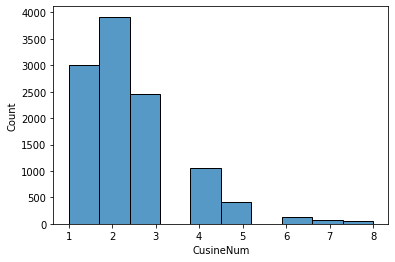

In [69]:
sns.histplot(food['CusineNum'], bins=10)

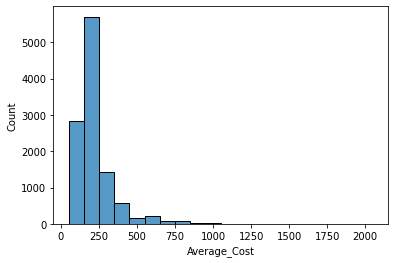

In [73]:
ax = sns.histplot(food['Average_Cost'], bins=20)
# TODO: Annotate

In [89]:
food_summary = food.groupby(by=['City']).agg({'Average_Cost':np.average, 'Votes': np.average, 'Rating':np.average, 'Reviews': np.average, 
                                                'Minimum_Order_': np.average, 'Delivery_Time_': np.average})
food_summary.round(1)

,Average_Cost,Votes,Rating,Reviews,Minimum_Order_,Delivery_Time_
City,,,,,,
Bangalore,192.3,199.0,3.1,96.4,53.5,36.6
Delhi,205.9,201.5,3.0,103.4,52.6,36.7
Gurgaon,201.7,103.1,2.7,49.5,55.9,38.6
Hyderabad,148.8,170.2,3.1,28.8,51.8,34.9
Kolkata,161.4,231.0,2.9,105.5,53.4,38.6
Mumbai,223.4,236.9,3.1,120.0,52.6,37.5
Noida,204.8,161.9,2.9,84.2,55.0,38.2
Pune,216.8,246.6,3.0,123.0,51.7,35.5


<AxesSubplot:xlabel='Average_Cost', ylabel='Rating'>

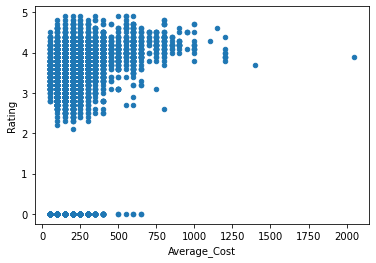

In [116]:
food.plot.scatter(x='Average_Cost',y='Rating')

<AxesSubplot:xlabel='City'>

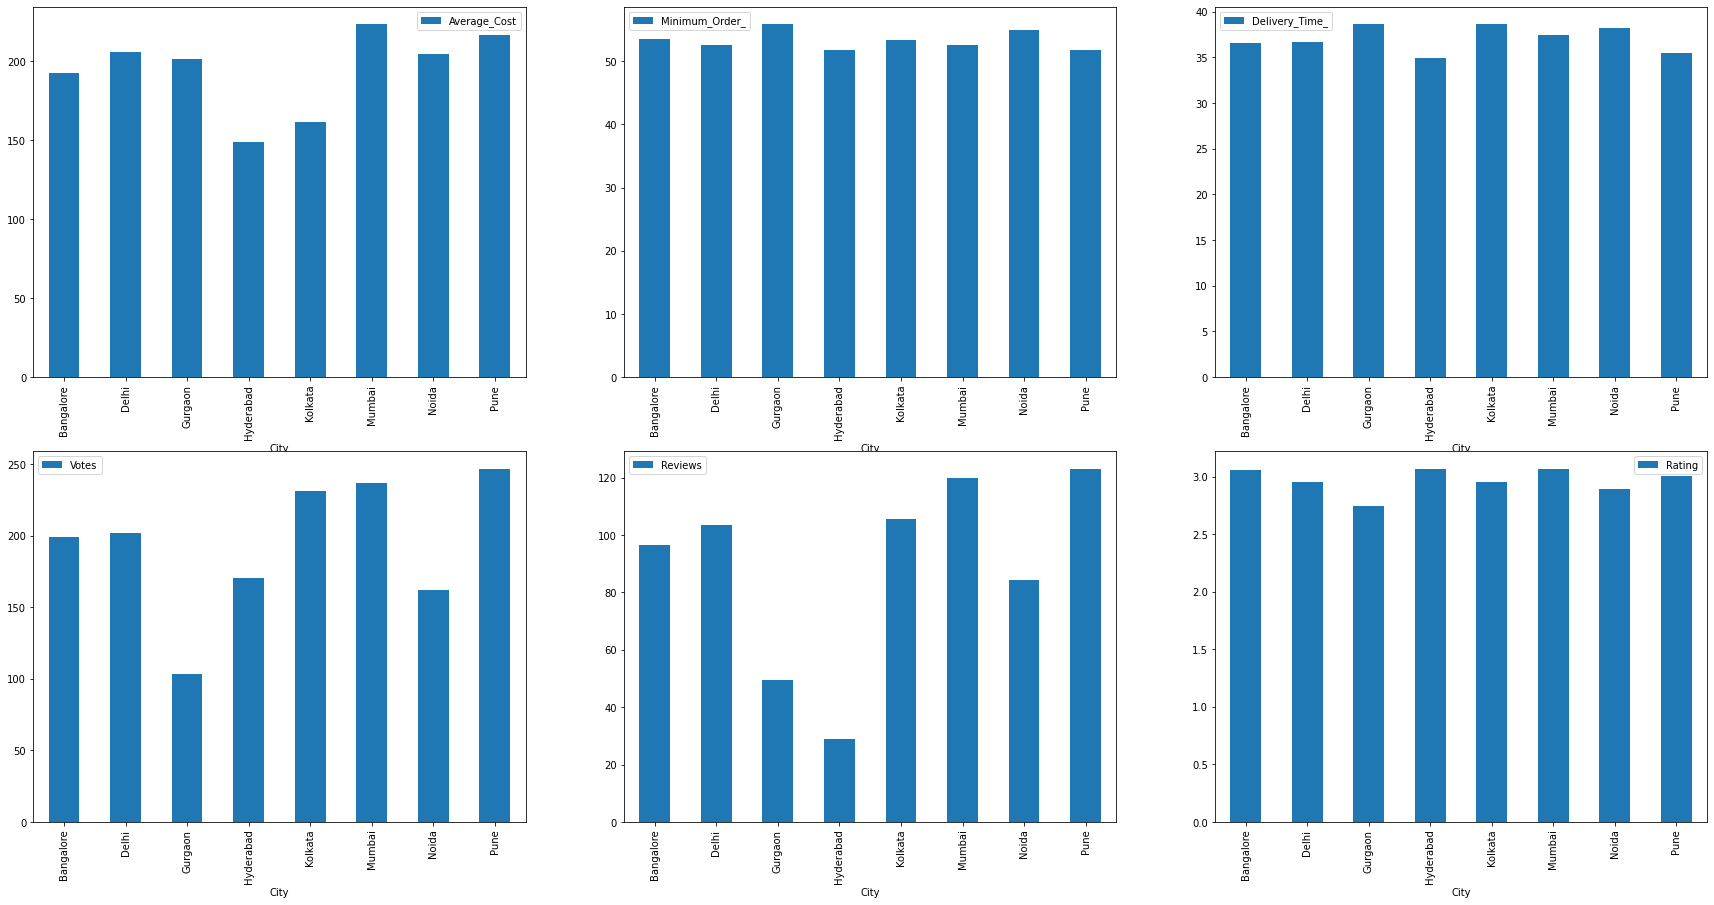

In [106]:
plt.figure(figsize=(30, 15))

ax=plt.subplot(2, 3, 1); food_summary.plot.bar(y='Average_Cost', ax=ax)
ax=plt.subplot(2, 3, 2); food_summary.plot.bar(y='Minimum_Order_', ax=ax) #, figsize=(20, 6))
ax=plt.subplot(2, 3, 3); food_summary.plot.bar(y='Delivery_Time_', ax=ax) #, figsize=(20, 6))

ax=plt.subplot(2, 3, 4); food_summary.plot.bar(y='Votes', ax=ax)#, figsize=(20, 6))
ax=plt.subplot(2, 3, 5); food_summary.plot.bar(y='Reviews', ax=ax)#, figsize=(20, 6))
ax=plt.subplot(2, 3, 6); food_summary.plot.bar(y='Rating', ax=ax)#, figsize=(20, 6))

<AxesSubplot:>

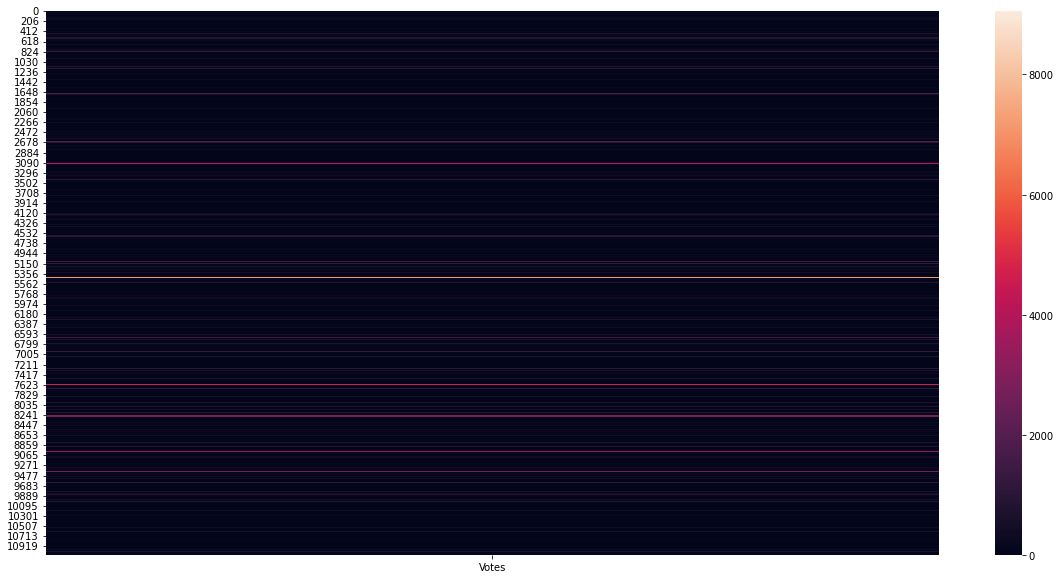

In [79]:
#plt.figure(figsize=(20,10))
#sns.heatmap(data=food[['Votes']])

In [126]:
food_Categories = {   
    'Indian - Regional' : ['Andhra', 'Assamese', 'Awadhi','Bengali', 'Bihari', 'Bohri',  'Chettinad',  'Kashmiri','Kerala', 'Goan', 'Gujarati', 'Hyderabadi', 
                        'Konkan',  'Lucknowi', 'Maharashtrian', 'Malwani', 'Mangalorean', 'Modern Indian', 'Naga','North Eastern', 'North Indian', 'Odia','Rajasthani',
                         'South Indian', 'Tamil' ],
    'International' : ['Afghan', 'African', 'American', 'Arabian', 'Asian', 'Bangladeshi', 'Belgian', 'Brazilian','Burmese', 'Cantonese', 'Chinese', 'Continental',
                    'European','French', 'German', 'Greek', 'Indian',  'Indonesian', 'Iranian', 'Israeli', 'Italian', 'Japanese', 'Korean', 'Lebanese',
                    'Malaysian', 'Mediterranean', 'Mexican', 'Middle Eastern',  'Momos', 'Nepalese', 'Pizza', 'Portuguese', 'Poké', 'South American', 'Spanish', 'Sri Lankan','Sushi',
                    'Tex-Mex', 'Thai', 'Tibetan', 'Turkish', 'Vietnamese'],
    'Beverages': ['Beverages', 'Bubble Tea', 'Coffee','Juices','Tea',],
    'Non-Veg':  ['Charcoal Chicken', 'Raw Meats', 'Roast Chicken', 'Seafood'],
    'Desserts': ['Desserts', 'Ice Cream','Frozen Yogurt','Mishti', 'Mithai', ],
    'Healthy': ['Healthy Food','Salad', ]
}   

''' 
 BBQ', 'Bakery',  'Bar Food',  'Biryani',  'Burger', 'Cafe',     'Fast Food', 'Finger Food',  
    'Hot dogs',   'Kebab', 
  'Mughlai',  'Paan', 'Parsi', , 
  'Rolls', 'Sandwich', 'Steak', 'Street Food',     'Wraps'''



" \n BBQ', 'Bakery',  'Bar Food',  'Biryani',  'Burger', 'Cafe',     'Fast Food', 'Finger Food',  \n    'Hot dogs',   'Kebab', \n  'Mughlai',  'Paan', 'Parsi', , \n  'Rolls', 'Salad', 'Sandwich', 'Steak', 'Street Food',   'Tex-Mex',  'Wraps"

In [34]:
def getCategory(x):
    #print(x.split(','))
    for i in x.split(','):
        if i in food_Categories['Indian - Regional']:
            return 'Indian'
        if i in food_Categories['International']:
            return 'International'
        if i in food_Categories['International']:
            return 'International'
        if i in food_Categories['International']:
            return 'International'
    return 'No Idea'
        

food['category'] = food['Cuisines'].apply(lambda x: getCategory(x))
food.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,City,category
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",200.0,₹50,3.5,12.0,4.0,30 minutes,Pune,No Idea
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",100.0,₹50,3.5,11.0,4.0,30 minutes,Bangalore,No Idea
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",150.0,₹50,3.6,99.0,30.0,65 minutes,Mumbai,International
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",250.0,₹99,3.7,176.0,95.0,30 minutes,Noida,No Idea
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",200.0,₹99,3.2,521.0,235.0,65 minutes,Bangalore,No Idea


In [35]:
food[food['category'] == 'Indian']

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,City,category
5,ID_5221,"Rmz Centennial, I Gate, Whitefield","South Indian, North Indian, Chinese",150.0,₹50,3.8,46.0,18.0,30 minutes,Bangalore,Indian
10,ID_5159,Mumbai Central,"North Indian, Chinese, Mughlai",350.0,₹50,3.8,186.0,61.0,30 minutes,Mumbai,Indian
18,ID_5262,Pune University,"Kerala, Bihari",150.0,₹50,0.0,0.0,0.0,30 minutes,Pune,Indian
19,ID_8148,"Gora Bazar, Rajbari, North Dumdum, Kolkata",South Indian,100.0,₹50,3.7,159.0,46.0,30 minutes,Kolkata,Indian
21,ID_3994,"Sector 14, Noida","North Indian, Rolls",150.0,₹50,3.9,387.0,160.0,45 minutes,Noida,Indian
...,...,...,...,...,...,...,...,...,...,...,...
11086,ID_2050,"FTI College, Law College Road, Pune","North Indian, Fast Food",300.0,₹50,0.0,0.0,0.0,30 minutes,Pune,Indian
11088,ID_944,"Rmz Centennial, I Gate, Whitefield","North Indian, Chinese, Biryani",150.0,₹50,3.6,56.0,18.0,30 minutes,Bangalore,Indian
11091,ID_3392,Majestic,"South Indian, Chinese, North Indian",100.0,₹50,3.5,45.0,18.0,30 minutes,Bangalore,Indian
11092,ID_4115,"Sector 3, Marathalli",North Indian,100.0,₹50,3.1,24.0,9.0,30 minutes,Bangalore,Indian


In [36]:
food[food['category'] == 'International']

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,City,category
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",150.0,₹50,3.6,99.0,30.0,65 minutes,Mumbai,International
7,ID_745,Delhi University-GTB Nagar,"Chinese, Thai, Asian",650.0,₹50,4.0,1731.0,1235.0,45 minutes,Delhi,International
11,ID_1696,"Yerawada, Pune, Maharashtra","Chinese, Thai, Indonesian, Italian",800.0,₹50,4.2,1693.0,1239.0,45 minutes,Mumbai,International
16,ID_2141,"Sector 1, Noida",Italian,100.0,₹50,0.0,0.0,0.0,30 minutes,Noida,International
17,ID_3355,"Dockyard Road, Mumbai CST Area","Chinese, North Indian, South Indian, Fast Food",200.0,₹50,3.7,139.0,47.0,30 minutes,Mumbai,International
...,...,...,...,...,...,...,...,...,...,...,...
11062,ID_1742,"Sector 1, Noida","Chinese, Fast Food, Beverages",300.0,₹0,3.7,142.0,72.0,45 minutes,Noida,International
11080,ID_646,"Sector 1, Noida","Chinese, Seafood, Asian, North Indian",650.0,₹50,4.0,715.0,422.0,65 minutes,Noida,International
11083,ID_6048,"Nathan Road, Mangaldas Road, Pune","Chinese, South Indian, Fast Food, North Indian",400.0,₹50,4.3,1741.0,736.0,30 minutes,Pune,International
11087,ID_1309,"Dockyard Road, Mumbai CST Area","Chinese, Mughlai, North Indian",200.0,₹50,3.5,63.0,34.0,30 minutes,Mumbai,International


In [37]:
food[food['category'] == 'No Idea'].shape[0]

5472

In [38]:
food['Cuisines']

0        Fast Food, Rolls, Burger, Salad, Wraps
1                           Ice Cream, Desserts
2               Italian, Street Food, Fast Food
3                Mughlai, North Indian, Chinese
4                               Cafe, Beverages
                          ...                  
11089      Tibetan, Chinese, Continental, Momos
11090                                 Fast Food
11091       South Indian, Chinese, North Indian
11092                              North Indian
11093                              North Indian
Name: Cuisines, Length: 11093, dtype: object